<a href="https://colab.research.google.com/github/FelipeBrasill/LLM-e-Estat-stica-/blob/main/Atividade2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade 2.2 - Matemática Computacional

$Aluno: Felipe \ Lisboa \ Brasil \ Matrícula:202404940029$

$Professor: Claudomiro \ Sales$

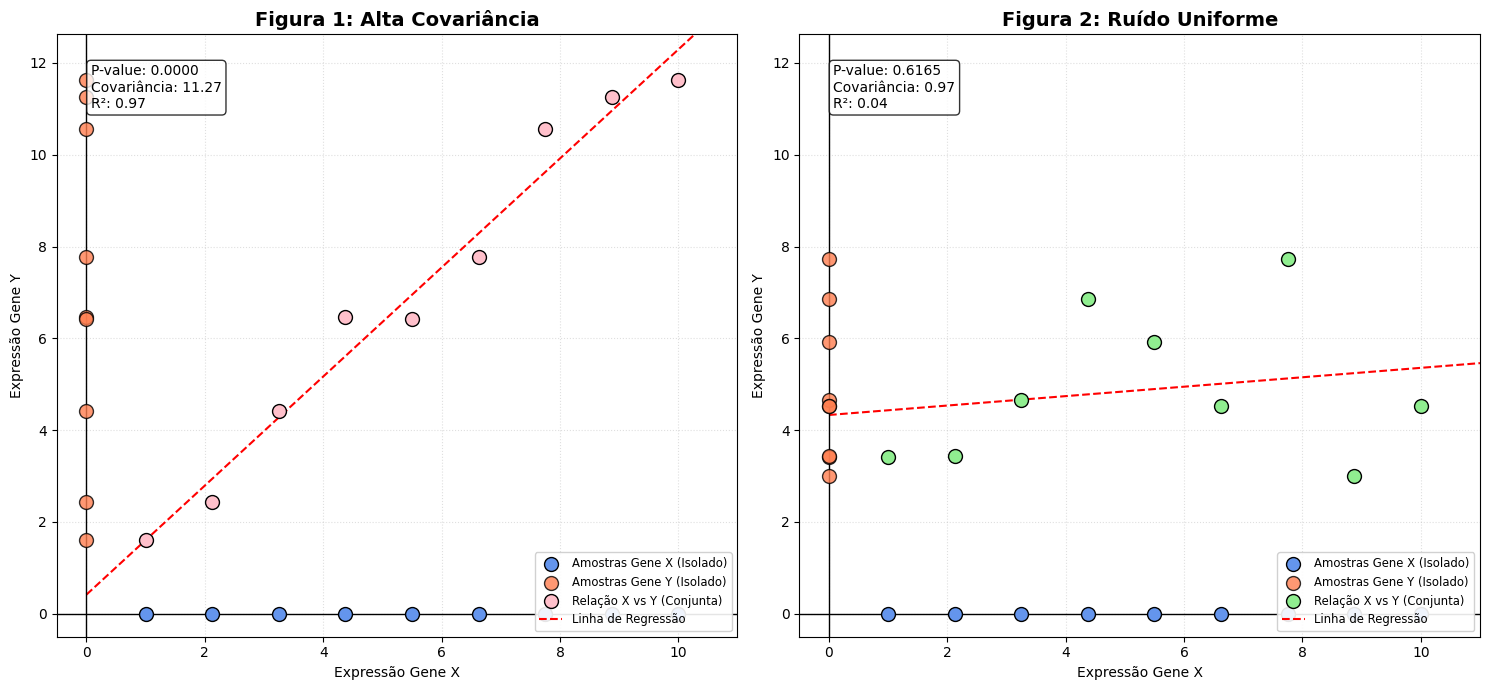

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

np.random.seed(42)

x = np.linspace(1, 10, 9)
y1 = 1.2 * x + np.random.normal(0, 0.8, 9)
y2 = np.random.uniform(y1.min(), y1.max(), 9)

# --- 2. Cálculos ---
res1 = linregress(x, y1)
res2 = linregress(x, y2)
cov1 = np.cov(x, y1)[0, 1]
cov2 = np.cov(x, y2)[0, 1]

# --- 3. Plotagem ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

def plot_completo(ax, x_data, y_data, res, cov, titulo, main_color):
    ax.set_xlim(-0.5, 11)
    ax.set_ylim(-0.5, max(y1.max(), y2.max()) + 1)

    color_axis_x = 'cornflowerblue' #ixo Azul para o e X
    color_axis_y = 'coral'          # Laranja/Coral para o eixo Y

    # 1. Pontos no Eixo X (Representando amostras do Gene X)
    # y é fixado em 0
    ax.scatter(x_data, np.zeros_like(x_data), c=color_axis_x, s=100, edgecolors='k',
               label='Amostras Gene X (Isolado)', zorder=3)

    # 2. Pontos no Eixo Y (Representando amostras do Gene Y)
    # x é fixado em 0
    ax.scatter(np.zeros_like(y_data), y_data, c=color_axis_y, s=100, edgecolors='k',
               label='Amostras Gene Y (Isolado)', alpha=0.8, zorder=3)

    # 3. Pontos de Dispersão (O cruzamento X e Y)
    ax.scatter(x_data, y_data, c=main_color, s=100, edgecolors='k', marker='o',
               label='Relação X vs Y (Conjunta)', zorder=4)

    # Linha de Regressão
    x_line = np.linspace(0, 11, 100)
    y_line = res.slope * x_line + res.intercept
    ax.plot(x_line, y_line, 'r--', linewidth=1.5, label='Linha de Regressão')

    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_xlabel('Expressão Gene X')
    ax.set_ylabel('Expressão Gene Y')
    ax.axhline(0, color='black', linewidth=1) # Eixo X visível
    ax.axvline(0, color='black', linewidth=1) # Eixo Y visível
    ax.grid(True, linestyle=':', alpha=0.4)

    # Estatísticas
    info = (f"P-value: {res.pvalue:.4f}\n"
            f"Covariância: {cov:.2f}\n"
            f"R²: {res.rvalue**2:.2f}")
    ax.text(0.05, 0.95, info, transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.legend(loc='lower right', fontsize='small', framealpha=0.9)

plot_completo(ax1, x, y1, res1, cov1, "Figura 1: Alta Covariância", 'pink')
plot_completo(ax2, x, y2, res2, cov2, "Figura 2: Ruído Uniforme", 'lightgreen')

plt.tight_layout()
plt.show()

#PARTE B

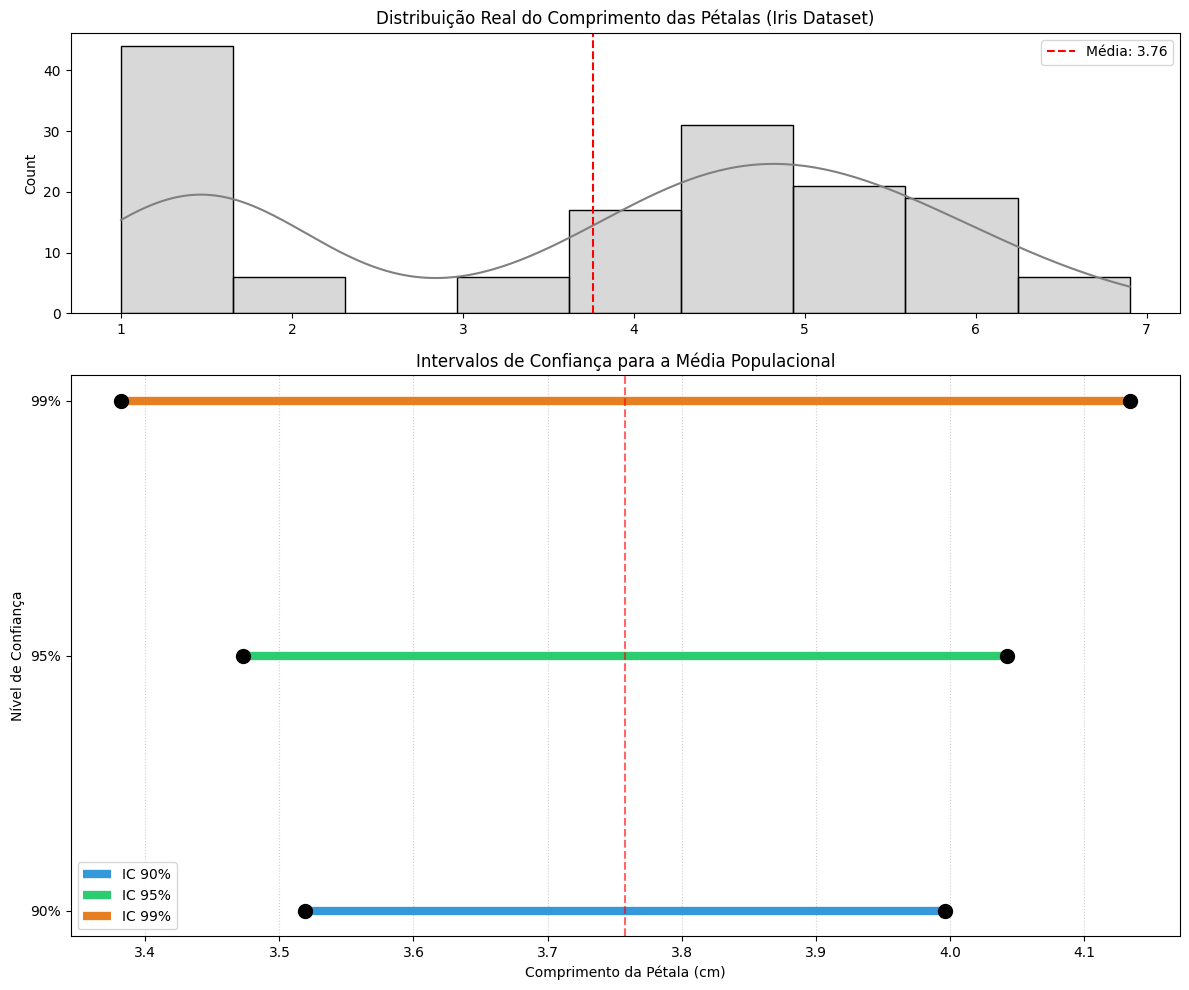

Tamanho da amostra: 150 flores
Média Amostral: 3.76 cm
Desvio Padrão: 1.77 cm

IC 90%: [3.5194 a 3.9966]
IC 95%: [3.4732 a 4.0428]
IC 99%: [3.3819 a 4.1341]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

df = sns.load_dataset('iris')

# Vamos usar o comprimento da pétala como nossa base real
# Selecionamos apenas uma espécie (setosa) para um exemplo mais controlado,
# ou o dataset todo para ver maior variabilidade.
dados_reais = df['petal_length'].values

# 2. Cálculos para Intervalo de Confiança (IC)
media = np.mean(dados_reais)
desvio_padrao = np.std(dados_reais, ddof=1)
n = len(dados_reais)
erro_padrao = desvio_padrao / np.sqrt(n)

def calcular_ic(confianca):
    # Retorna (limite_inferior, limite_superior)
    return stats.t.interval(confianca, df=n-1, loc=media, scale=erro_padrao)

niveis = [0.90, 0.95, 0.99]
intervalos = [calcular_ic(n) for n in niveis]

# --- 3. Visualização ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 2]})

# fig. 1  Distribuição Real dos Dados
sns.histplot(dados_reais, kde=True, ax=ax1, color='gray', alpha=0.3)
ax1.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
ax1.set_title('Distribuição Real do Comprimento das Pétalas (Iris Dataset)')
ax1.legend()

# fig.2  Gráfico de Baixo: Comparação dos Intervalos de Confiança
cores = ['#3498db', '#2ecc71', '#e67e22']
for i, (ic, cor) in enumerate(zip(intervalos, cores)):
    ax2.hlines(i, ic[0], ic[1], colors=cor, lw=6, label=f'IC {int(niveis[i]*100)}%')
    ax2.plot([ic[0], ic[1]], [i, i], 'ok', markersize=10) # Pontos nas extremidades

ax2.axvline(media, color='red', linestyle='--', alpha=0.6)
ax2.set_yticks(range(len(niveis)))
ax2.set_yticklabels([f'{int(n*100)}%' for n in niveis])
ax2.set_xlabel('Comprimento da Pétala (cm)')
ax2.set_ylabel('Nível de Confiança')
ax2.set_title('Intervalos de Confiança para a Média Populacional')
ax2.grid(axis='x', linestyle=':', alpha=0.6)
ax2.legend()

plt.tight_layout()
plt.show()

# Print dos resultados para a apresentação
print(f"Tamanho da amostra: {n} flores")
print(f"Média Amostral: {media:.2f} cm")
print(f"Desvio Padrão: {desvio_padrao:.2f} cm\n")
for i, n_conf in enumerate(niveis):
    print(f"IC {int(n_conf*100)}%: [{intervalos[i][0]:.4f} a {intervalos[i][1]:.4f}]")

#PARTE C

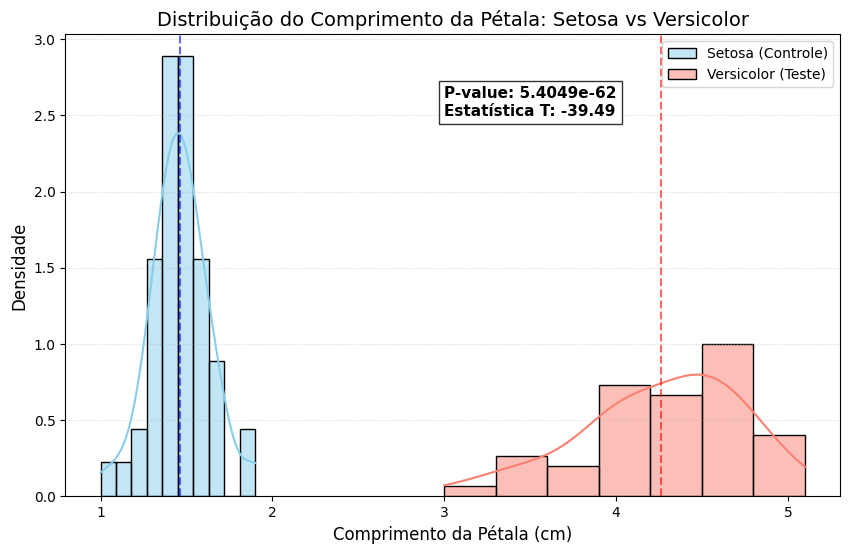

P-value: 5.4049e-62
Decisão: Rejeitamos H0. As espécies têm distribuições significativamente diferentes.


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Obtenção dos Dados (Exemplo Iris)
df = sns.load_dataset('iris')

# Definindo os grupos
controle = df[df['species'] == 'setosa']['petal_length']
teste = df[df['species'] == 'versicolor']['petal_length']

# 2. Hipóteses e Significância
# H0: As médias são iguais | H1: As médias são diferentes
alpha = 0.05

# 3. Execução do Teste T
t_stat, p_value = stats.ttest_ind(controle, teste, equal_var=True)

plt.figure(figsize=(10, 6))

# Plotando as distribuições de frequência e densidade
sns.histplot(controle, kde=True, color="skyblue", label="Setosa (Controle)", stat="density", alpha=0.5)
sns.histplot(teste, kde=True, color="salmon", label="Versicolor (Teste)", stat="density", alpha=0.5)

# Configurações do Gráfico
plt.title('Distribuição do Comprimento da Pétala: Setosa vs Versicolor', fontsize=14)
plt.xlabel('Comprimento da Pétala (cm)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()

plt.axvline(controle.mean(), color='blue', linestyle='--', alpha=0.6, label='Média Setosa')
plt.axvline(teste.mean(), color='red', linestyle='--', alpha=0.6, label='Média Versicolor')

plt.text(3, 2.5, f'P-value: {p_value:.4e}\nEstatística T: {t_stat:.2f}',
         bbox=dict(facecolor='white', alpha=0.8), fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.show()

print(f"P-value: {p_value:.4e}")
if p_value < alpha:
    print("Decisão: Rejeitamos H0. As espécies têm distribuições significativamente diferentes.")

#PARTE D

In [ ]:
import numpy as np
from scipy.stats import ttest_ind
import pandas as pd

def simular_erro_tipo_1(alpha, num_simulations=10000):
    sample_size = 30
    true_mean = 50
    true_std = 10
    significant_results = 0

    for _ in range(num_simulations):
        # H0 é VERDADEIRA: Ambos os grupos vêm da mesma distribuição
        group1 = np.random.normal(true_mean, true_std, sample_size)
        group2 = np.random.normal(true_mean, true_std, sample_size)

        t_stat, p_value = ttest_ind(group1, group2)

        if p_value < alpha:
            significant_results += 1

    return significant_results / num_simulations

# Testando com dois valores de alpha
alphas = [0.05, 0.01]
resultados = {f"Alpha {a}": simular_erro_tipo_1(a) for a in alphas}

for label, prop in resultados.items():
    print(f"{label} -> Proporção de Falsos Positivos (Erro Tipo I): {prop:.4f}")

Alpha 0.05 -> Proporção de Falsos Positivos (Erro Tipo I): 0.0474
Alpha 0.01 -> Proporção de Falsos Positivos (Erro Tipo I): 0.0119


#PARTE E

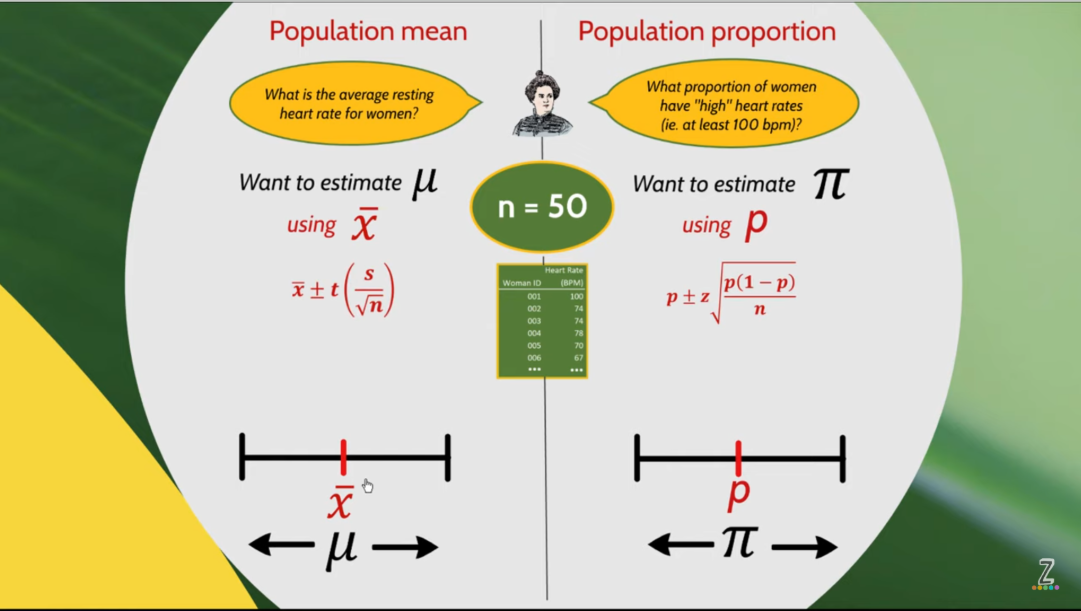

In [9]:
import numpy as np
import pandas as pd
from scipy import stats
# --> Dados
np.random.seed(42)
dados_visiveis = [100, 74, 74, 78, 70, 67]
dados_restantes = np.random.normal(loc=75, scale=12, size=44).astype(int)
amostra = np.array(dados_visiveis + list(dados_restantes))
n = len(amostra)
confianca = 0.95

# --- 2. Cálculos ---
# Média
media_amostral = np.mean(amostra)
erro_padrao_media = np.std(amostra, ddof=1) / np.sqrt(n)
t_critico = stats.t.ppf((1 + confianca) / 2, df=n-1)
margem_media = t_critico * erro_padrao_media

# Proporção
p_chapeu = np.sum(amostra >= 100) / n
z_critico = stats.norm.ppf((1 + confianca) / 2)
erro_padrao_prop = np.sqrt((p_chapeu * (1 - p_chapeu)) / n)
margem_prop = z_critico * erro_padrao_prop


data = {
    "Parâmetro": ["Média Populacional (μ)", "Proporção Populacional (π)"],
    "Estimativa Pontual": [f"{media_amostral:.2f} bpm", f"{p_chapeu:.2%}"],
    "Erro Padrão": [f"{erro_padrao_media:.4f}", f"{erro_padrao_prop:.4f}"],
    "Margem de Erro (95%)": [f"±{margem_media:.2f}", f"±{margem_prop:.2%}"],
    "Intervalo de Confiança": [
        f"[{media_amostral - margem_media:.2f} ; {media_amostral + margem_media:.2f}]",
        f"[{max(0, p_chapeu - margem_prop):.2%} ; {p_chapeu + margem_prop:.2%}]"
    ]
}

pd.DataFrame(data)



,Parâmetro,Estimativa Pontual,Erro Padrão,Margem de Erro (95%),Intervalo de Confiança
0,Média Populacional (μ),72.86 bpm,1.5639,±3.14,[69.72 ; 76.00]
1,Proporção Populacional (π),2.00%,0.0198,±3.88%,[0.00% ; 5.88%]


#PARTE F

--- Sumário Estatístico (Statsmodels) ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     108.2
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           1.11e-06
Time:                        18:16:44   Log-Likelihood:                -1.2798
No. Observations:                  12   AIC:                             6.560
Df Residuals:                      10   BIC:                             7.529
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

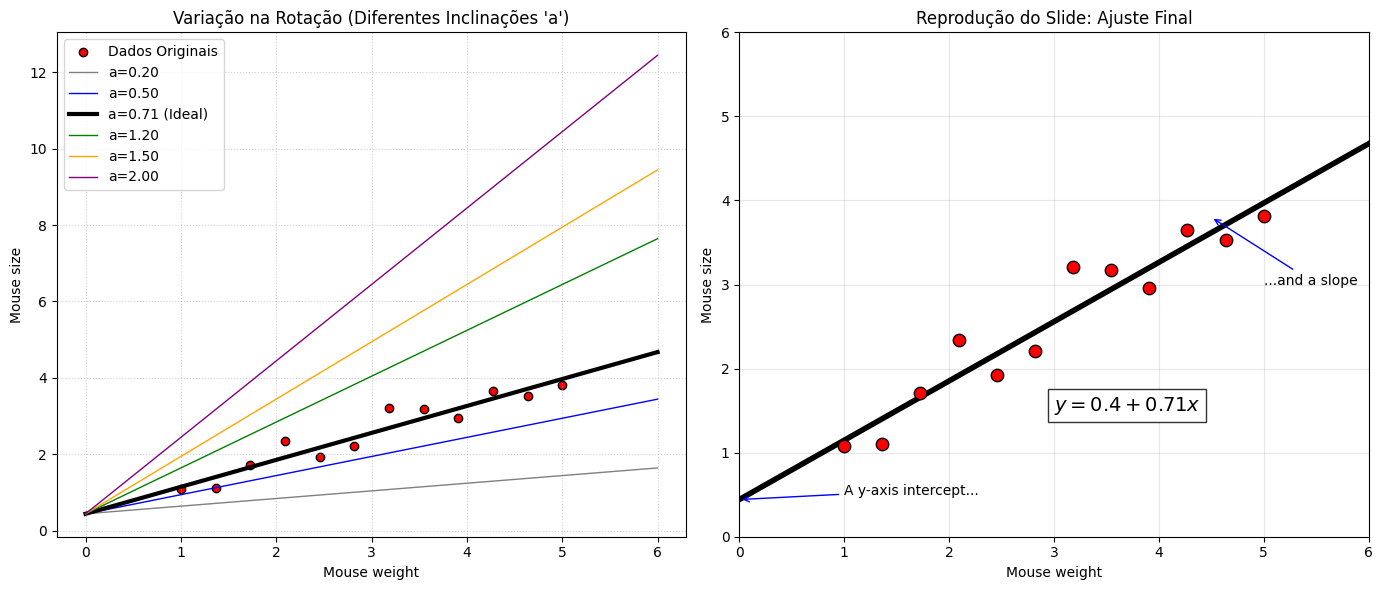

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# 1. Geração de Dados Sintéticos (Simulando o slide do "Mouse")
np.random.seed(42)
mouse_weight = np.linspace(1, 5, 12).reshape(-1, 1)
# Criando uma relação linear com ruído: y = 0.1 + 0.78x + erro
mouse_size = 0.1 + 0.78 * mouse_weight + np.random.normal(0, 0.4, size=mouse_weight.shape)

# --- 2. Regressão Linear com Scikit-Learn ---
model_sk = LinearRegression()
model_sk.fit(mouse_weight, mouse_size)
intercept_sk = model_sk.intercept_[0]
slope_sk = model_sk.coef_[0][0]

# --- 3. Estatísticas com Statsmodels ---
# Adicionando a constante (intercepto) exigida pelo statsmodels
X_sm = sm.add_constant(mouse_weight)
model_sm = sm.OLS(mouse_size, X_sm).fit()

print("--- Sumário Estatístico (Statsmodels) ---")
print(model_sm.summary())

# --- 4. Plotagem: Diferentes Inclinações (Rotação) ---
plt.figure(figsize=(14, 6))

# Subplot 1: Variação da Rotação
plt.subplot(1, 2, 1)
plt.scatter(mouse_weight, mouse_size, color='red', edgecolors='black', label='Dados Originais')

# Fixamos o intercepto (b) obtido e variamos a inclinação (a)
slopes_variados = [0.2, 0.5, slope_sk, 1.2, 1.5, 2.0]
colors = ['gray', 'blue', 'black', 'green', 'orange', 'purple']

x_range = np.linspace(0, 6, 100)
for s, c in zip(slopes_variados, colors):
    y_line = intercept_sk + s * x_range
    label = f"a={s:.2f} (Ideal)" if s == slope_sk else f"a={s:.2f}"
    lw = 3 if s == slope_sk else 1
    plt.plot(x_range, y_line, color=c, linewidth=lw, label=label)

plt.title("Variação na Rotação (Diferentes Inclinações 'a')")
plt.xlabel("Mouse weight")
plt.ylabel("Mouse size")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

# --- 5. Plotagem: Gráfico Final (Reprodução do Slide) ---
plt.subplot(1, 2, 2)
plt.scatter(mouse_weight, mouse_size, color='red', s=80, edgecolors='black', zorder=3)
y_pred = model_sk.predict(x_range.reshape(-1, 1))

plt.plot(x_range, y_pred, color='black', linewidth=4, label='Linha de Regressão')
plt.text(3, 1.5, f"$y = {intercept_sk:.1f} + {slope_sk:.2f}x$", fontsize=14,
         bbox=dict(facecolor='white', alpha=0.8))

# Anotações estilo slide
plt.annotate('A y-axis intercept...', xy=(0, intercept_sk), xytext=(1, 0.5),
             arrowprops=dict(arrowstyle='->', color='blue'))
plt.annotate('...and a slope', xy=(4.5, 3.8), xytext=(5, 3),
             arrowprops=dict(arrowstyle='->', color='blue'))

plt.title("Reprodução do Slide: Ajuste Final")
plt.xlabel("Mouse weight")
plt.ylabel("Mouse size")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True, linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

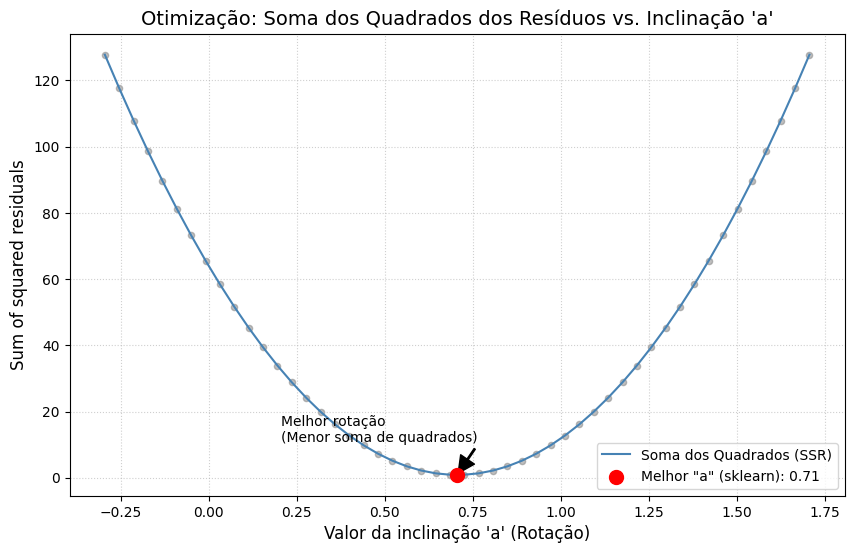

Melhor R-Squared (Scikit-learn): 0.9154
R-Squared para o primeiro 'a' da lista (-0.29): -11.4312


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Dados Sintéticos (Mouse weight vs Mouse size)
np.random.seed(42)
X = np.linspace(1, 5, 12).reshape(-1, 1)
y = 0.1 + 0.78 * X + np.random.normal(0, 0.4, size=X.shape)

# 2. Melhor ajuste com Scikit-Learn
model = LinearRegression()
model.fit(X, y)
a_best = model.coef_[0][0]
b_fixed = model.intercept_[0]
r2_best = model.score(X, y)

# 3. Cálculo da Soma dos Quadrados dos Resíduos (SSR) para diferentes 'a'
lista_a = np.linspace(a_best - 1, a_best + 1, 50)
ssr_lista = []
r2_lista = []

for a in lista_a:
    y_pred = b_fixed + a * X
    ssr = np.sum((y - y_pred)**2)
    ssr_lista.append(ssr)
    r2_lista.append(r2_score(y, y_pred))

# 4. Plotagem do Gráfico solicitado
plt.figure(figsize=(10, 6))

# Plot da curva de erro
plt.plot(lista_a, ssr_lista, color='steelblue', label='Soma dos Quadrados (SSR)')
plt.scatter(lista_a, ssr_lista, color='gray', s=20, alpha=0.5)

# Destaque para o melhor 'a' (Scikit-learn)
plt.scatter(a_best, min(ssr_lista), color='red', s=100, zorder=5,
            label=f'Melhor "a" (sklearn): {a_best:.2f}')

# Adicionando setas e textos estilo o slide enviado
plt.annotate('Melhor rotação\n(Menor soma de quadrados)',
             xy=(a_best, min(ssr_lista)), xytext=(a_best - 0.5, min(ssr_lista) + 10),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1))

# Estética do gráfico
plt.title("Otimização: Soma dos Quadrados dos Resíduos vs. Inclinação 'a'", fontsize=14)
plt.xlabel("Valor da inclinação 'a' (Rotação)", fontsize=12)
plt.ylabel("Sum of squared residuals", fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

plt.show()

# --- Comparação de R-Squared ---
print(f"Melhor R-Squared (Scikit-learn): {r2_best:.4f}")
print(f"R-Squared para o primeiro 'a' da lista ({lista_a[0]:.2f}): {r2_lista[0]:.4f}")

# PARTE G

In [15]:
import numpy as np

# Dados do Exemplo 7
A = np.array([[3.0, -4.0, 1.0],
              [1.0, 2.0, 2.0],
              [4.0, 0.0, -3.0]])
b = np.array([9.0, 3.0, -2.0])
n = len(b)

print("--- ETAPA 1: CÁLCULO DOS FATORES (DECOMPOSIÇÃO LU) ---")

# Inicialização do vetor de permutação
p = np.zeros(n, dtype=int)
for i in range(n):
    p[i] = i + 1  # Índices de 1 a n
print(f"p inicial: {p}")

# Algoritmo de Decomposição
for k in range(n - 1):
    # k em Python (0 a n-2) equivale a (1 a n-1) do pseudocódigo
    pv = abs(A[k, k])
    r = k

    # Busca do pivô na coluna k
    for i in range(k + 1, n):
        if abs(A[i, k]) > pv:
            pv = abs(A[i, k])
            r = i

    if pv == 0:
        print("A matriz A é singular")
        break

    # Troca de linhas se r != k
    if r != k:
        # Troca no vetor de permutação
        aux_p = p[k]
        p[k] = p[r]
        p[r] = aux_p

        # Troca na matriz A
        for j in range(n):
            aux_a = A[k, j]
            A[k, j] = A[r, j]
            A[r, j] = aux_a
        print(f"\n[Troca] Linha {k+1} <-> Linha {r+1}")
        print(f"Vetor p atual: {p}")

    # Eliminação Gaussiana e armazenamento de L e U
    for i in range(k + 1, n):
        m = A[i, k] / A[k, k]
        A[i, k] = m  # O multiplicador m é armazenado no lugar do zero em L
        for j in range(k + 1, n):
            A[i, j] = A[i, j] - m * A[k, j]

    print(f"\nMatriz A após etapa k={k+1} (L e U compactos):")
    print(A)

print("\n--- ETAPA 2: RESOLUÇÃO DOS SISTEMAS TRIANGULARES ---")

# Permutação c = Pb
c = np.zeros(n)
for i in range(n):
    r_perm = p[i] - 1 # Ajuste para índice zero do Python
    c[i] = b[r_perm]
print(f"Vetor c (após p): {c}")

# Substituição para Frente Ly = c
y = np.zeros(n)
for i in range(n):
    soma = 0
    for j in range(i):
        soma = soma + A[i, j] * y[j]
    y[i] = c[i] - soma
print(f"Vetor y (L*y = c): {y}")

# Substituição para Trás Ux = y
x = np.zeros(n)
for i in range(n - 1, -1, -1):
    soma = 0
    for j in range(i + 1, n):
        soma = soma + A[i, j] * x[j]
    x[i] = (y[i] - soma) / A[i, i]

print(f"\nSOLUÇÃO FINAL x: {x}")

--- ETAPA 1: CÁLCULO DOS FATORES (DECOMPOSIÇÃO LU) ---
p inicial: [1 2 3]

[Troca] Linha 1 <-> Linha 3
Vetor p atual: [3 2 1]

Matriz A após etapa k=1 (L e U compactos):
[[ 4.    0.   -3.  ]
 [ 0.25  2.    2.75]
 [ 0.75 -4.    3.25]]

[Troca] Linha 2 <-> Linha 3
Vetor p atual: [3 1 2]

Matriz A após etapa k=2 (L e U compactos):
[[ 4.     0.    -3.   ]
 [ 0.75  -4.     3.25 ]
 [ 0.25  -0.5    4.375]]

--- ETAPA 2: RESOLUÇÃO DOS SISTEMAS TRIANGULARES ---
Vetor c (após p): [-2.  9.  3.]
Vetor y (L*y = c): [-2.   10.5   8.75]

SOLUÇÃO FINAL x: [ 1. -1.  2.]


#PARTE H  - MÉTODO ITERATIVO DE GAUSS-JACOBI

#PARTE I

In [29]:
import numpy as np

def verificar_criterio_linhas(A):
    n = len(A)
    alphas = []
    for k in range(n):
        soma_fora_diagonal = np.sum(np.abs(A[k, :])) - np.abs(A[k, k])
        alphas.append(soma_fora_diagonal / np.abs(A[k, k]))

    alpha_max = max(alphas)
    return alpha_max < 1, alpha_max

def gauss_seidel_detalhado(A, b, x0, tol=1e-4, max_iter=20):
    n = len(b)
    x = x0.copy()

    print(f"Iteração 0: {x}")

    for k in range(1, max_iter + 1):
        x_antigo = x.copy()
        for i in range(n):
            # No Gauss-Seidel, usamos os valores x já atualizados na mesma iteração
            soma = b[i]
            for j in range(n):
                if i != j:
                    soma -= A[i, j] * x[j]
            x[i] = soma / A[i, i]

        # Cálculo do erro para exibição
        erro = np.max(np.abs(x - x_antigo))
        print(f"Iteração {k}: {x} | Erro: {erro:.6f}")

        if erro < tol:
            return x, k
    return x, max_iter

# --- DADOS DO EXEMPLO 14 ---
A_ex14 = np.array([[5.0, 1.0, 1.0],
                   [3.0, 4.0, 1.0],
                   [3.0, 3.0, 6.0]])
b_ex14 = np.array([5.0, 6.0, 0.0])

print("--- VERIFICAÇÃO DE CONVERGÊNCIA ---")
converge_linhas, alpha = verificar_criterio_linhas(A_ex14)
print(f"Critério das Linhas: {'Satisfeito' if converge_linhas else 'Não satisfeito'} (Alpha Max: {alpha:.2f})")
print("Nota: Mesmo com Alpha=1.0, o Critério de Sassenfeld garante a convergência (Beta=0.55).")

print("\n--- EXECUÇÃO DO MÉTODO DE GAUSS-SEIDEL ---")
x0 = np.zeros(3)
solucao, iters = gauss_seidel_detalhado(A_ex14, b_ex14, x0)

print(f"\nResultado Final: {solucao} atingido em {iters} iterações.")

--- VERIFICAÇÃO DE CONVERGÊNCIA ---
Critério das Linhas: Não satisfeito (Alpha Max: 1.00)
Nota: Mesmo com Alpha=1.0, o Critério de Sassenfeld garante a convergência (Beta=0.55).

--- EXECUÇÃO DO MÉTODO DE GAUSS-SEIDEL ---
Iteração 0: [0. 0. 0.]
Iteração 1: [ 1.     0.75  -0.875] | Erro: 1.000000
Iteração 2: [ 1.025   0.95   -0.9875] | Erro: 0.200000
Iteração 3: [ 1.0075    0.99125  -0.999375] | Erro: 0.041250
Iteração 4: [ 1.001625  0.998625 -1.000125] | Erro: 0.007375
Iteração 5: [ 1.0003      0.99980625 -1.00005312] | Erro: 0.001325
Iteração 6: [ 1.00004938  0.99997625 -1.00001281] | Erro: 0.000251
Iteração 7: [ 1.00000731  0.99999772 -1.00000252] | Erro: 0.000042

Resultado Final: [ 1.00000731  0.99999772 -1.00000252] atingido em 7 iterações.
